In [10]:
!git clone https://github.com/vaidehi0105/PCOS-IMAGE-DATASET.git

fatal: destination path 'PCOS-IMAGE-DATASET' already exists and is not an empty directory.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import random
import os
import cv2
import numpy as np
from tqdm import tqdm  # For progress bar
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [56]:
# setting up input and output directories
input_dir_infected="C:/Users/ASUS/project/PCOS-IMAGE-DATASET/PCOS/infected"
input_dir_notinfected="C:/Users/ASUS/project/PCOS-IMAGE-DATASET/PCOS/notinfected"

output_dir_pcos='Augumented/Augumented_PCOS'
output_dir_notpcos='Augumented/Augumented_notPCOS'

In [51]:
ls

 Volume in drive C is OS
 Volume Serial Number is 10C1-8099

 Directory of C:\Users\ASUS\project

12/12/2023  02:13 PM    <DIR>          .
12/11/2023  02:58 PM    <DIR>          ..
12/11/2023  02:54 PM    <DIR>          .ipynb_checkpoints
12/12/2023  01:48 PM    <DIR>          Augumented
12/12/2023  02:01 PM         1,173,012 pcos_detection_dl.ipynb
12/11/2023  02:48 PM    <DIR>          PCOS-IMAGE-DATASET
12/12/2023  02:13 PM           143,155 Testinfg.ipynb
               2 File(s)      1,316,167 bytes
               5 Dir(s)  100,310,986,752 bytes free


In [53]:
os.path.isfile(input_dir_infected + "/img1.jpg")

True

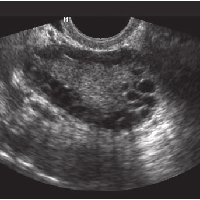

In [45]:
# displaying PCOS images
import keras.utils as image
img_pcos=image.load_img('C:/Users/ASUS/project/PCOS-IMAGE-DATASET/PCOS/infected/img1.jpg',target_size=(200,200))
img_pcos

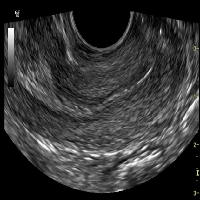

In [46]:
#displaying Non -PCOS images
import keras.utils as image
img_notpcos=image.load_img('C:/Users/ASUS/project/PCOS-IMAGE-DATASET/PCOS/notinfected/img1.jpeg',target_size=(200,200))
img_notpcos

In [47]:
from PIL import Image

In [48]:


# Define the data augmentation functions
def apply_augmentation(image, augmentation_function):
    augmented_image = augmentation_function(image)

    return augmented_image

def random_flip(image):
    return cv2.flip(image, np.random.randint(0, 3))

def random_rotation(image, max_angle=130):
    angle = np.random.randint(-max_angle, max_angle)
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (width, height))



In [54]:


# List all image files in the input directory
image_files = [f for f in os.listdir(input_dir_infected) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]

# Define the number of augmented images to generate per original image
num_augmentations = 5

# Perform data augmentation
for image_file in tqdm(image_files, desc="Augmenting images"):
    image_path = os.path.join(input_dir_infected, image_file)
    image = cv2.imread(image_path)

    for i in range(num_augmentations):
        augmented_image = apply_augmentation(image, random_flip)  # You can replace this function
        augmented_image = apply_augmentation(augmented_image, random_rotation)

        augmented_filename = f"augmented_{i+1}_{image_file}"
        augmented_filepath = os.path.join(output_dir_pcos, augmented_filename)
        cv2.imwrite(augmented_filepath, augmented_image)


Augmenting images: 100%|█████████████████████████████████████████████████████████████| 781/781 [00:17<00:00, 45.17it/s]


In [39]:
os.path.isfile(input_dir_infected +"/img1.jpg")

False

In [57]:


# List all image files in the input directory
image_files = [f for f in os.listdir(input_dir_notinfected) if f.endswith('.jpg') or f.endswith('.png')]

# Define the number of augmented images to generate per original image
num_augmentations = 5

# Perform data augmentation
for image_file in tqdm(image_files, desc="Augmenting images"):
    image_path = os.path.join(input_dir_notinfected, image_file)
    image = cv2.imread(image_path)

    for i in range(num_augmentations):
        augmented_image = apply_augmentation(image, random_flip)  # You can replace this function
        augmented_image = apply_augmentation(augmented_image, random_rotation)

        augmented_filename = f"augmented_{i+1}_{image_file}"
        augmented_filepath = os.path.join(output_dir_notpcos, augmented_filename)
        cv2.imwrite(augmented_filepath, augmented_image)


Augmenting images: 100%|█████████████████████████████████████████████████████████████| 780/780 [01:08<00:00, 11.32it/s]


In [59]:
!pip install tensorflow tensorflow opencv-python matplotlib


In [60]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [61]:
import numpy as np
from matplotlib import pyplot as plt

In [64]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/ASUS/project/Augumented')

Found 7805 files belonging to 2 classes.


In [65]:
data_previous = tf.keras.utils.image_dataset_from_directory('C:/Users/ASUS/project/PCOS-IMAGE-DATASET')

Found 1562 files belonging to 1 classes.


In [66]:
data_iterator = data.as_numpy_iterator()

In [67]:
batch = data_iterator.next()

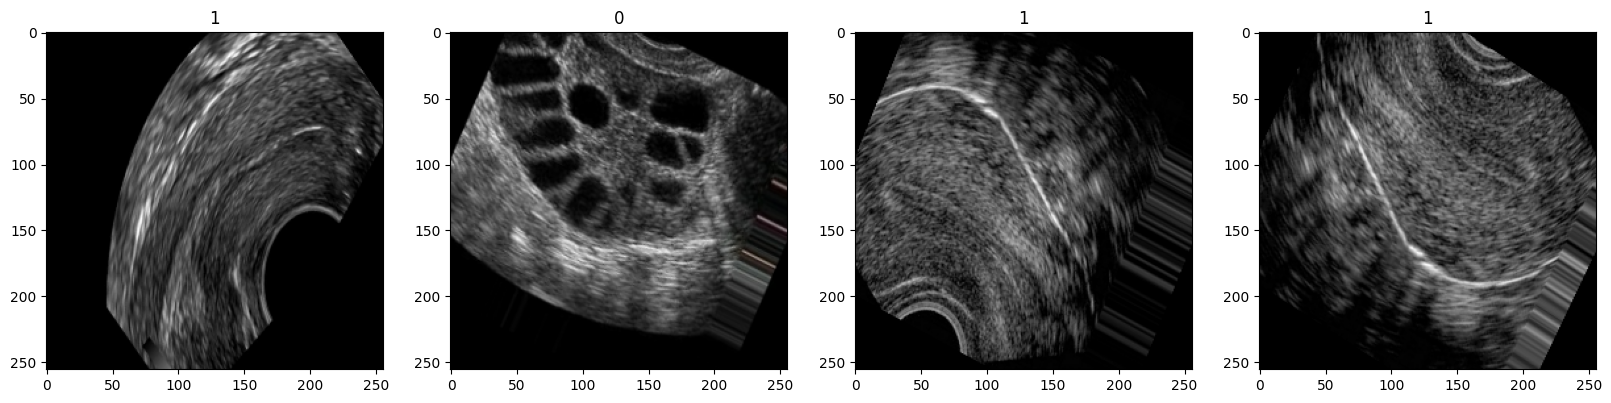

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [69]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [71]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [72]:
print(len(data))

244


In [73]:
print(train_size)
print(val_size)
print(test_size)

170
48
24


In [74]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 258064)            0         
                                                                 
 dense (Dense)               (None, 256)               66064640  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66065345 (252.02 MB)
Trainable params: 66065345 (252.02 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [78]:
logdir='logs'

In [79]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [120]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
170/170 [==============================] - 220s 1s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9915
Epoch 2/3
170/170 [==============================] - 13448s 80s/step - loss: 4.2835e-04 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9915
Epoch 3/3
170/170 [==============================] - 193s 1s/step - loss: 2.1551e-04 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9915


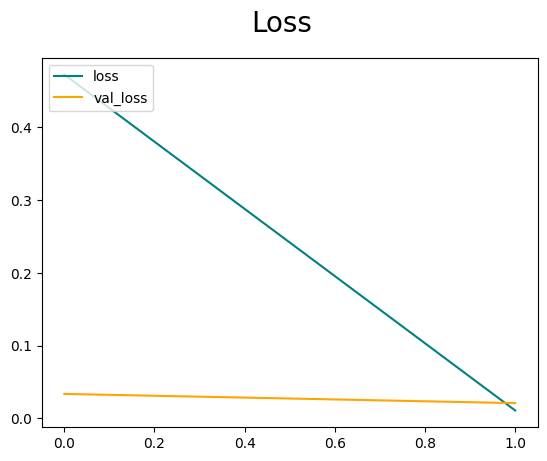

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

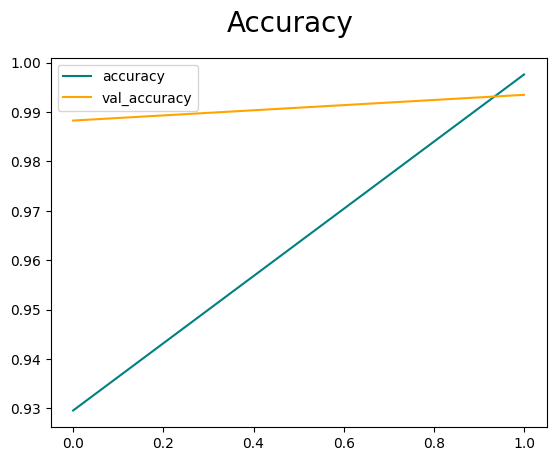

In [82]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [85]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 220ms/step


In [86]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9974811, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.99869794, shape=(), dtype=float32)


In [88]:
ls

 Volume in drive C is OS
 Volume Serial Number is 10C1-8099

 Directory of C:\Users\ASUS\project

12/12/2023  02:52 PM    <DIR>          .
12/11/2023  02:58 PM    <DIR>          ..
12/11/2023  02:54 PM    <DIR>          .ipynb_checkpoints
12/12/2023  01:48 PM    <DIR>          Augumented
12/12/2023  02:43 PM    <DIR>          logs
12/12/2023  02:35 PM         1,173,012 pcos_detection_dl.ipynb
12/11/2023  02:48 PM    <DIR>          PCOS-IMAGE-DATASET
12/12/2023  02:52 PM           755,148 Testinfg.ipynb
               2 File(s)      1,928,160 bytes
               6 Dir(s)  95,467,573,248 bytes free


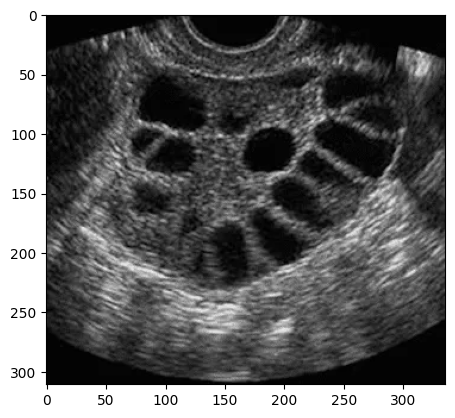

In [96]:
import cv2
img = cv2.imread('C:/Users/ASUS/project/ultrasound.webp')
plt.imshow(img)
plt.show()

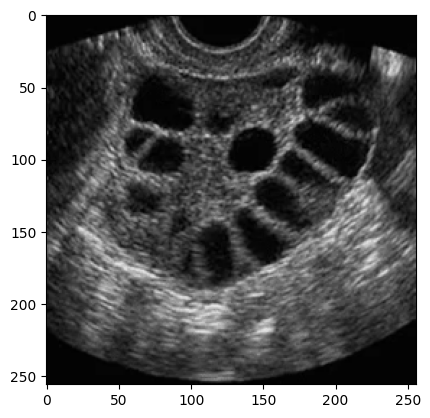

In [97]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
predictions = model.predict(np.expand_dims(resize/255, 0))
print(predictions)

1/1 [==============================] - 0s 161ms/step
[[0.00142055]]


In [99]:
if predictions > 0.5:
    print(f'not PCOS')
else:
    print(f'PCOS')

PCOS


In [101]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier_deepcnn.tf'))

INFO:tensorflow:Assets written to: models\imageclassifier_deepcnn.tf\assets


INFO:tensorflow:Assets written to: models\imageclassifier_deepcnn.tf\assets


In [103]:
ls


 Volume in drive C is OS
 Volume Serial Number is 10C1-8099

 Directory of C:\Users\ASUS\project

12/12/2023  03:06 PM    <DIR>          .
12/11/2023  02:58 PM    <DIR>          ..
12/11/2023  02:54 PM    <DIR>          .ipynb_checkpoints
12/12/2023  01:48 PM    <DIR>          Augumented
12/12/2023  02:43 PM    <DIR>          logs
12/12/2023  03:06 PM    <DIR>          models
12/12/2023  02:54 PM         1,173,999 pcos_detection_dl.ipynb
12/11/2023  02:48 PM    <DIR>          PCOS-IMAGE-DATASET
12/12/2023  03:06 PM         1,145,627 Testinfg.ipynb
12/12/2023  02:57 PM            19,594 ultrasound.webp
               3 File(s)      2,339,220 bytes
               7 Dir(s)  93,806,022,656 bytes free


In [104]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [105]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[256,256, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[256,256, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=48, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [106]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [107]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [108]:
newmodel_svm = cnn.fit(train, epochs=2, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/2
170/170 [==============================] - 48s 271ms/step - loss: 0.1146 - accuracy: 0.9529 - val_loss: 0.0253 - val_accuracy: 0.9980
Epoch 2/2
170/170 [==============================] - 46s 269ms/step - loss: 0.0148 - accuracy: 0.9982 - val_loss: 0.0119 - val_accuracy: 0.9993


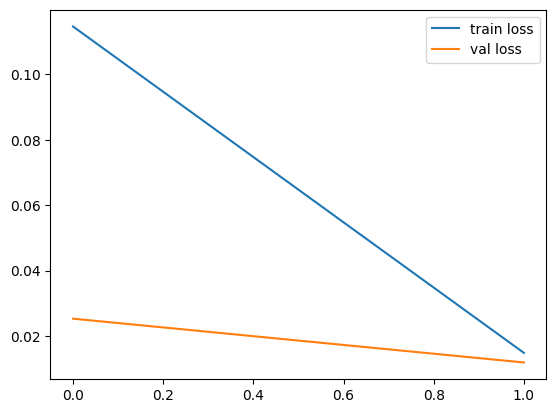

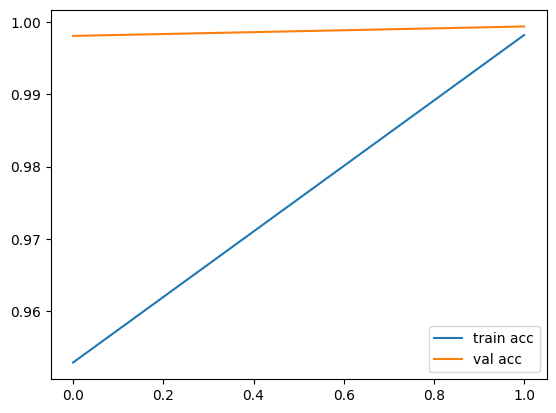

<Figure size 640x480 with 0 Axes>

In [109]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(newmodel_svm.history['loss'], label='train loss')
plt.plot(newmodel_svm.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(newmodel_svm.history['accuracy'], label='train acc')
plt.plot(newmodel_svm.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [111]:

from tensorflow.keras.models import load_model

cnn.save('models/cnn_svm.tf')

INFO:tensorflow:Assets written to: models/cnn_svm.tf\assets


INFO:tensorflow:Assets written to: models/cnn_svm.tf\assets


In [112]:
ls


 Volume in drive C is OS
 Volume Serial Number is 10C1-8099

 Directory of C:\Users\ASUS\project

12/12/2023  03:12 PM    <DIR>          .
12/11/2023  02:58 PM    <DIR>          ..
12/11/2023  02:54 PM    <DIR>          .ipynb_checkpoints
12/12/2023  03:12 PM             2,396 AccVal_acc.png
12/12/2023  01:48 PM    <DIR>          Augumented
12/12/2023  02:43 PM    <DIR>          logs
12/12/2023  03:12 PM             2,396 LossVal_loss.png
12/12/2023  03:12 PM    <DIR>          models
12/12/2023  03:08 PM         1,173,999 pcos_detection_dl.ipynb
12/11/2023  02:48 PM    <DIR>          PCOS-IMAGE-DATASET
12/12/2023  03:12 PM         1,150,919 Testinfg.ipynb
12/12/2023  02:57 PM            19,594 ultrasound.webp
               5 File(s)      2,349,304 bytes
               7 Dir(s)  92,603,125,760 bytes free


In [119]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/ASUS/project/test2.jpeg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0]<0:
    print("The image belongs to PCOS PATIENT")
else:
    print("The image belongs to Non-Pcos Patient")

1/1 [==============================] - 0s 65ms/step
The image belongs to Non-Pcos Patient
